# Project 2 - H1N1_Vacination_Prediction

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
h1n1_vac = pd.read_csv("https://raw.githubusercontent.com/SANTHOSH2945/H1N1-vacination/main/H1N1_Predict.csv")
h1n1_vac

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


### Data visualization

In [3]:
h1n1_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

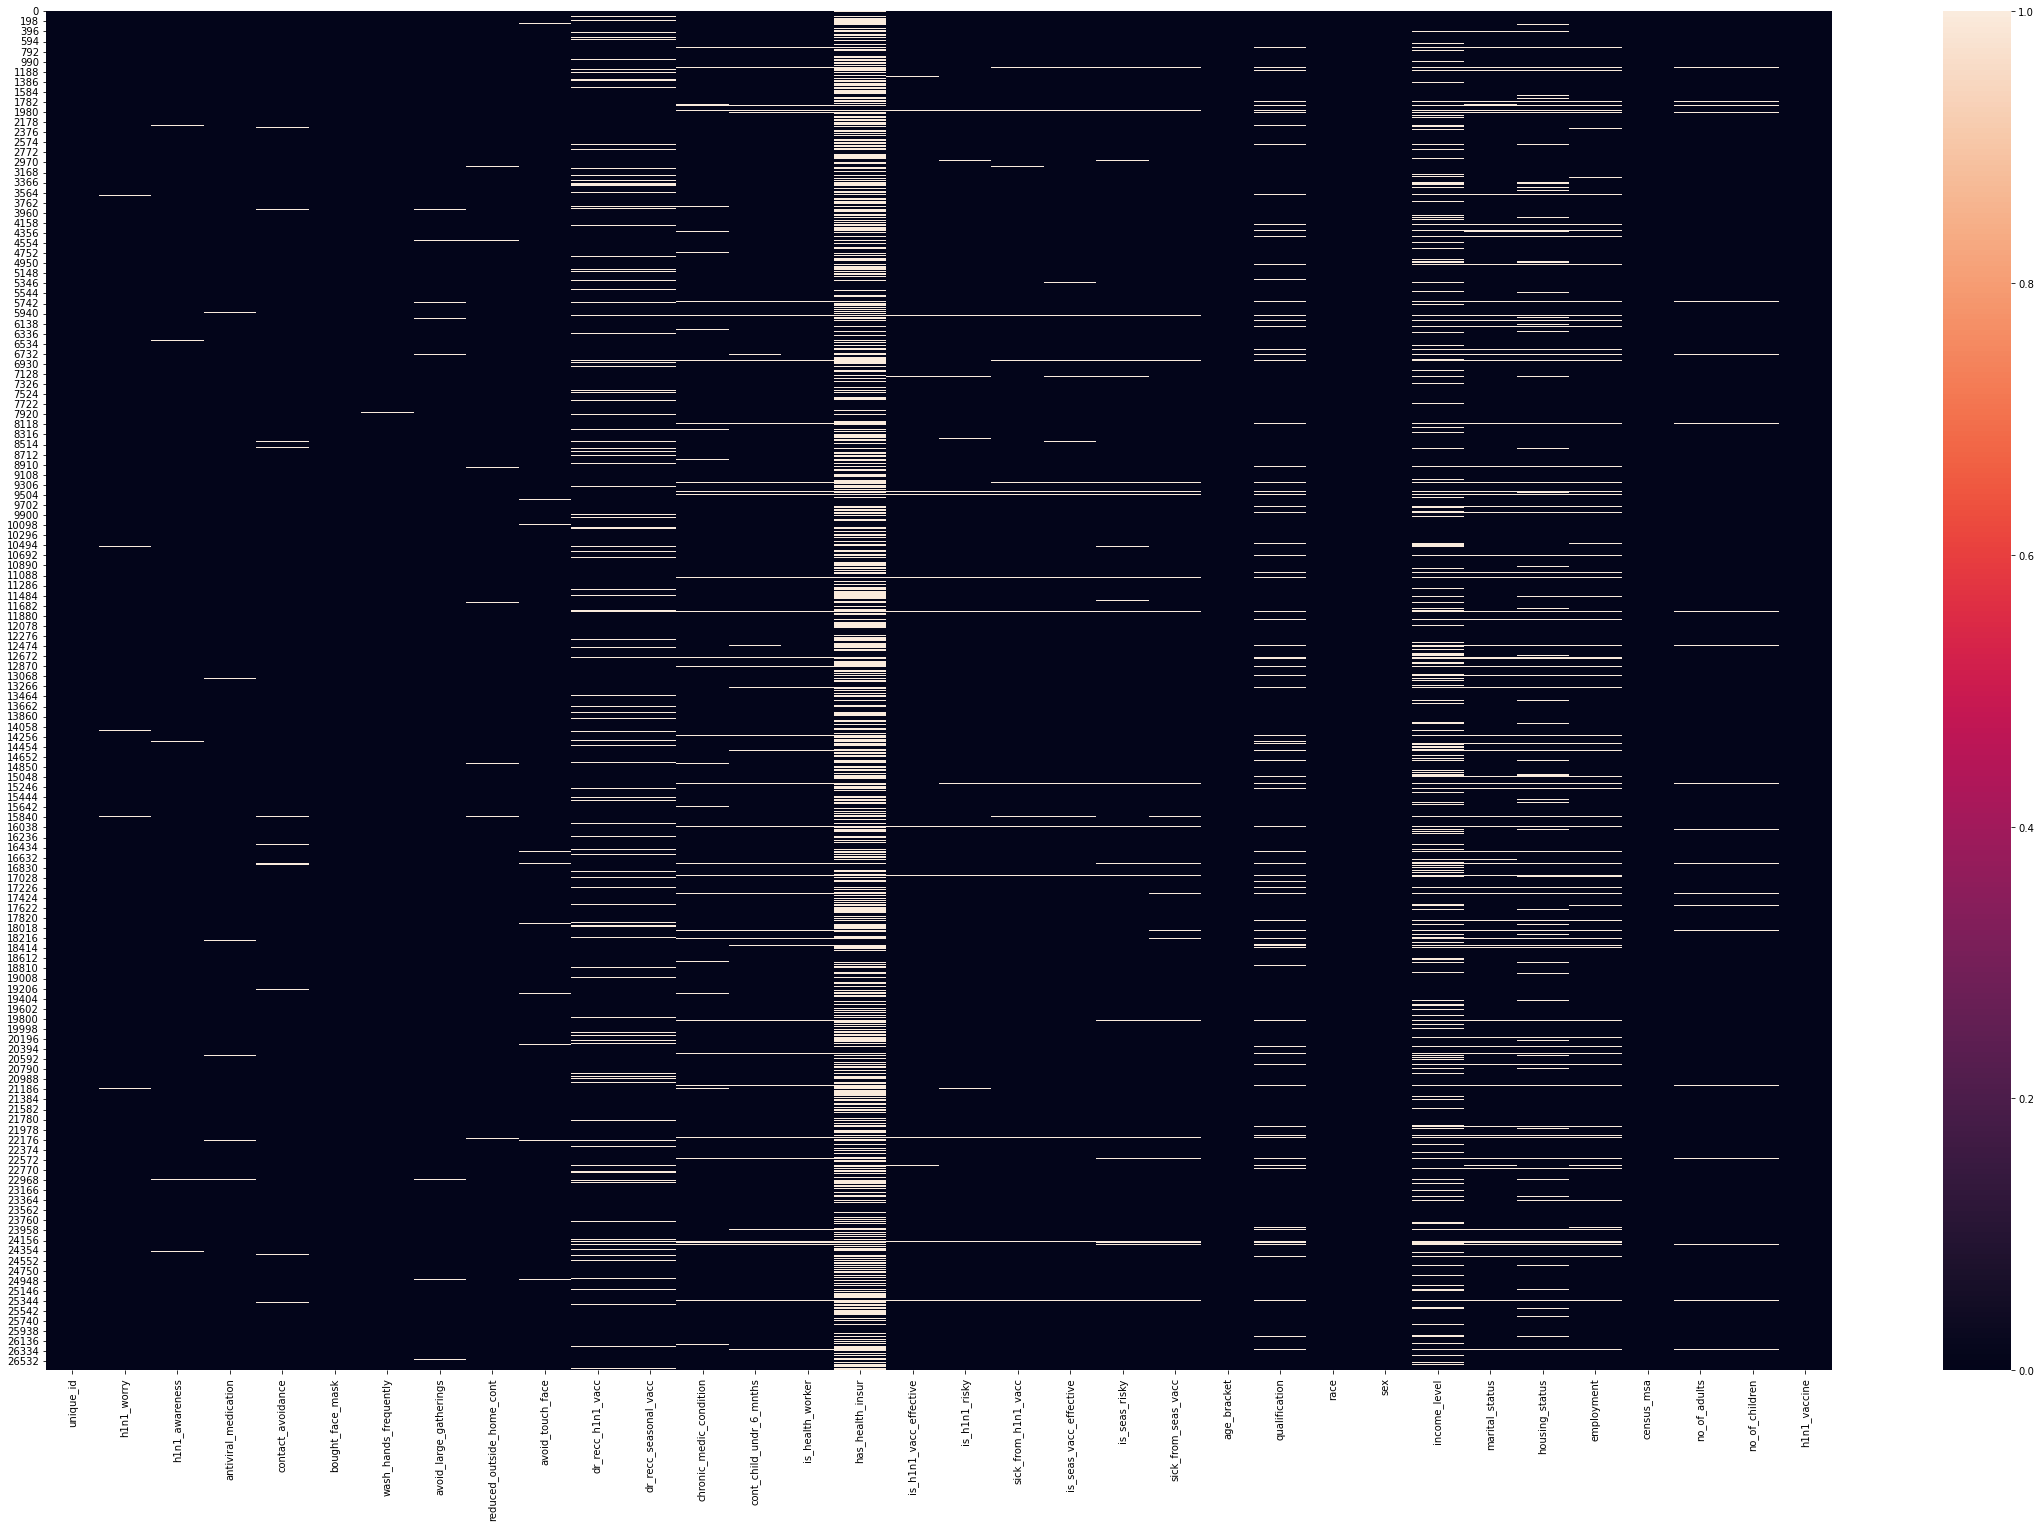

In [4]:
fig, ax = plt.subplots(figsize = (40,25))
sns.heatmap(h1n1_vac.isnull(), ax =ax)
plt.show()

In [5]:
h1n1_vac.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [6]:
h1n1_vac.describe(include = "object")

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [7]:
h1n1_vac.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

## Data Handling

In [8]:
#Dropping the unique_id column, because it has no significance
h1n1_vac.drop("unique_id", axis = 1, inplace = True)

In [9]:
#Handling the null values
null_list = ["h1n1_worry","h1n1_awareness","is_h1n1_vacc_effective",
             "is_h1n1_risky","sick_from_h1n1_vacc","is_seas_vacc_effective",
            "is_seas_risky","sick_from_seas_vacc","income_level"]
for i in null_list:
    h1n1_vac[i].fillna(h1n1_vac[i].mode()[0], inplace =True)
h1n1_vac

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [10]:
null_list = ["antiviral_medication","contact_avoidance","bought_face_mask",
             "wash_hands_frequently","avoid_large_gatherings",
             "reduced_outside_home_cont","avoid_touch_face","dr_recc_h1n1_vacc",
            "dr_recc_seasonal_vacc","chronic_medic_condition","cont_child_undr_6_mnths",
            "is_health_worker","has_health_insur"]
for i in null_list:
   h1n1_vac[i].fillna(0,inplace = True)
h1n1_vac

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [11]:
h1n1_vac.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                    0
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [12]:
fillna_values = ["No qualification","Not Married","Rent", "Unemployed",0,0]
for i,j in zip(fillna_values, h1n1_vac.columns[h1n1_vac.isnull().sum()>0]):
    h1n1_vac[j].fillna(i, inplace = True)

In [13]:
for i in h1n1_vac.columns.drop("h1n1_vaccine"):
    h1n1_vac[i] = h1n1_vac[i].astype("object")

In [14]:
h1n1_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   h1n1_worry                 26707 non-null  object
 1   h1n1_awareness             26707 non-null  object
 2   antiviral_medication       26707 non-null  object
 3   contact_avoidance          26707 non-null  object
 4   bought_face_mask           26707 non-null  object
 5   wash_hands_frequently      26707 non-null  object
 6   avoid_large_gatherings     26707 non-null  object
 7   reduced_outside_home_cont  26707 non-null  object
 8   avoid_touch_face           26707 non-null  object
 9   dr_recc_h1n1_vacc          26707 non-null  object
 10  dr_recc_seasonal_vacc      26707 non-null  object
 11  chronic_medic_condition    26707 non-null  object
 12  cont_child_undr_6_mnths    26707 non-null  object
 13  is_health_worker           26707 non-null  object
 14  has_he

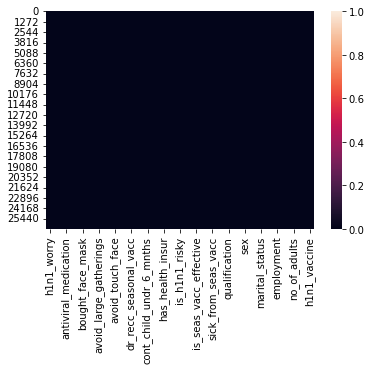

In [15]:
fig, ax = plt.subplots()
sns.heatmap(h1n1_vac.isnull(), vmax = 1, vmin = 0, ax =ax)
plt.show()

In [16]:
h1n1_vac.describe(include='object').transpose()

,count,unique,top,freq
h1n1_worry,26707.0,4.0,2.0,10667.0
h1n1_awareness,26707.0,3.0,1.0,14714.0
antiviral_medication,26707.0,2.0,0.0,25406.0
contact_avoidance,26707.0,2.0,1.0,19228.0
bought_face_mask,26707.0,2.0,0.0,24866.0
wash_hands_frequently,26707.0,2.0,1.0,22015.0
avoid_large_gatherings,26707.0,2.0,0.0,17160.0
reduced_outside_home_cont,26707.0,2.0,0.0,17726.0
avoid_touch_face,26707.0,2.0,1.0,18001.0
dr_recc_h1n1_vacc,26707.0,2.0,0.0,21299.0


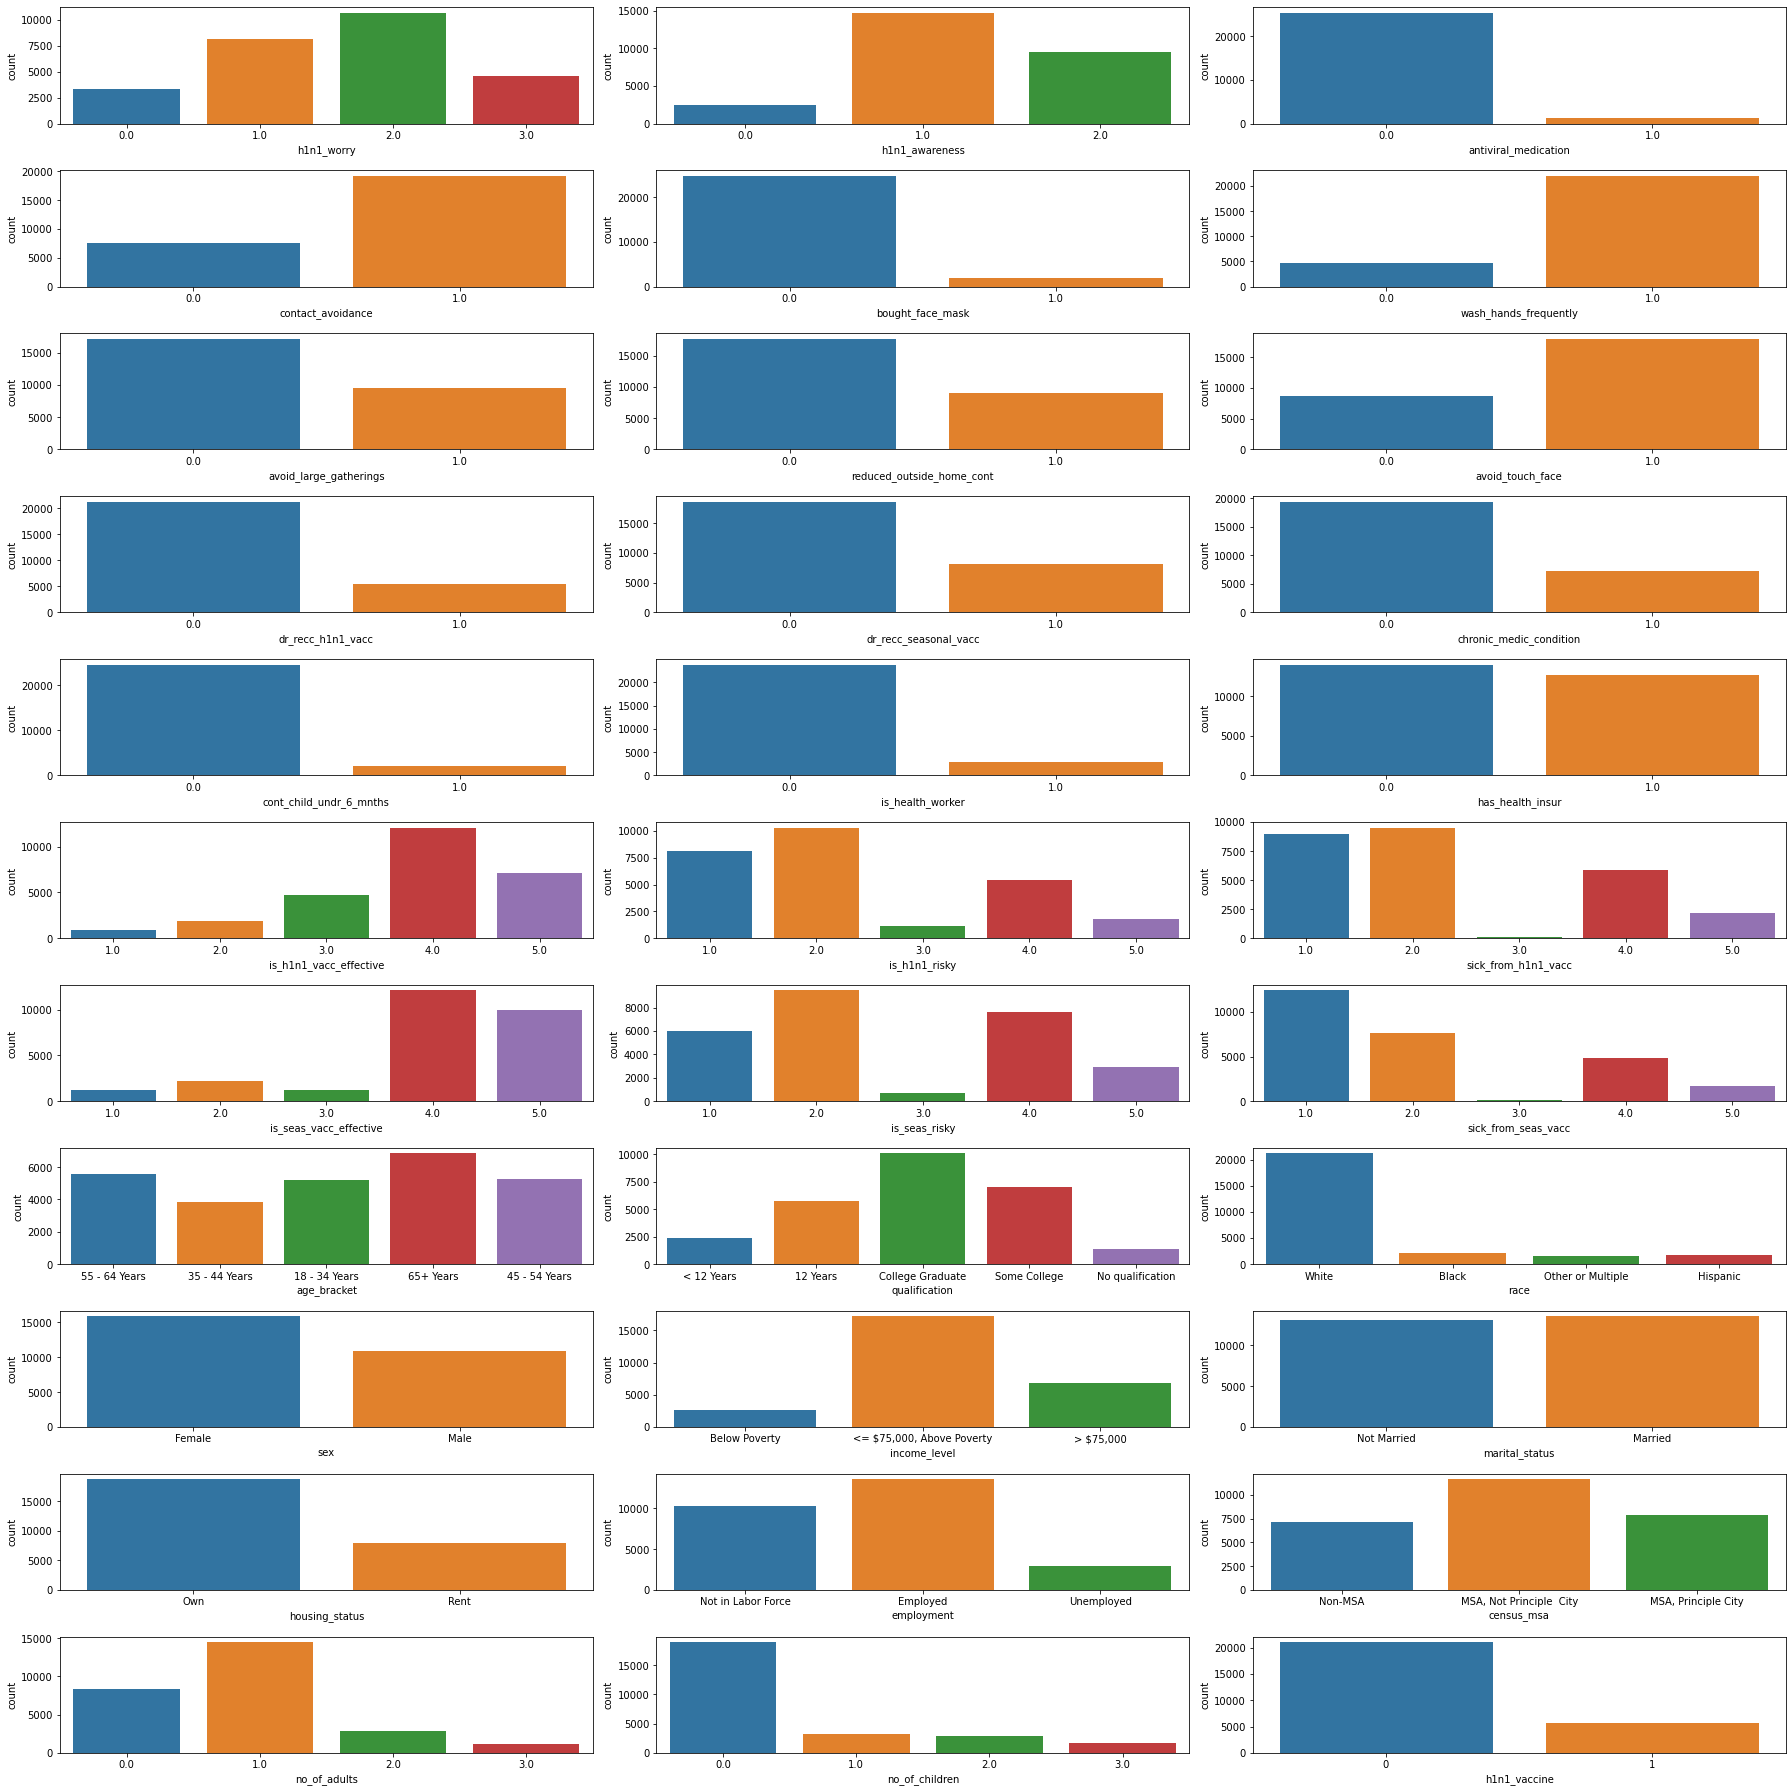

In [17]:
fig, ax = plt.subplots(nrows = 11 , ncols = 3, figsize = (25,25))
for i,j in zip(h1n1_vac.columns, ax.flatten()):
    sns.countplot(h1n1_vac[i], ax =j)
plt.tight_layout()
plt.show()

In [18]:
final_h1n1_vac = pd.get_dummies(h1n1_vac, drop_first = True)
final_h1n1_vac

,h1n1_vaccine,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
26703,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
26704,0,0,1,0,0,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
26705,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [19]:
final_h1n1_vac = sm.add_constant(final_h1n1_vac)
final_h1n1_vac

,const,h1n1_vaccine,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,1.0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,1.0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
26703,1.0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
26704,1.0,0,0,1,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
26705,1.0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


## Data Modelling

In [20]:
X = final_h1n1_vac.drop("h1n1_vaccine",axis = 1)
Y = final_h1n1_vac.h1n1_vaccine
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 1)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train,Y_train)

LogisticRegression(solver='newton-cg')

In [23]:
#Prediction
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(Y_test,predictions)

0.8511169349806564

In [26]:
model.score(X_train,Y_train)

0.8518776077885952

In [27]:
from sklearn import metrics

In [28]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6330
           1       0.72      0.48      0.58      1683

    accuracy                           0.85      8013
   macro avg       0.80      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(Y_test,predictions)

array([[6012,  318],
       [ 875,  808]], dtype=int64)

<AxesSubplot:>

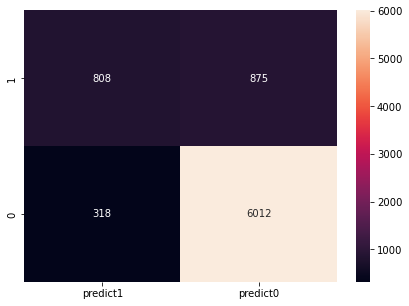

In [31]:
cm = metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
dbt_cm = pd.DataFrame(cm,index = [i for i in['1','0']],columns=[i for i in ['predict1','predict0']])
plt.figure(figsize = (7,5))
sns.heatmap(dbt_cm,annot = True,fmt='g')

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [33]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [34]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)


In [36]:
print('Precision: %.3f' % precision_score(Y_test, y_pred))
print('Recall: %.3f' % recall_score(Y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, y_pred))
print('F1 Score: %.3f' % f1_score(Y_test, y_pred))

Precision: 0.733
Recall: 0.462
Accuracy: 0.852
F1 Score: 0.567


In [37]:
log_mle_model = sm.Logit(Y_train,X_train).fit()
log_mle_model.summary()
y_pred_prob_mle = log_mle_model.predict(X_test)
y_pred_mle = [0 if x < 0.5 else 1 for x in y_pred_prob_mle]

Optimization terminated successfully.
         Current function value: 0.356050
         Iterations 7


In [38]:
def plot_roc(y_test,y_prob):
    print("ROC AUC Score: ", roc_auc_score(y_test, y_prob))
    fpr, tpr, thresholds = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1],[0,1], 'r--')
    plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_prob),4)))
    plt.grid(True)

ROC AUC Score:  0.8630671551496754


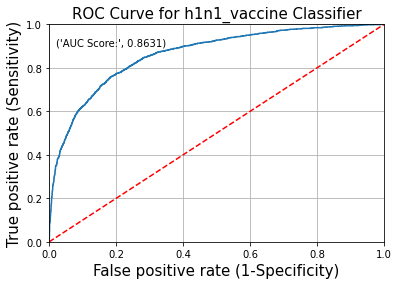

In [39]:
plot_roc(Y_test,y_pred_prob_mle)

In [40]:
# Logistic Regression model is working well

In [41]:
#Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_2 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=3)

In [44]:
model_2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=3)

In [45]:
model_2.score(X_train,Y_train)

0.8212795549374131

In [46]:
model_2.score(X_test,Y_test)

0.8249095220267066

# Ensemble learning - Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators = 50,base_estimator = model_2,random_state = 1)
bgcl = bgcl.fit(X_train,Y_train)


In [48]:
bgcl.score(X_train,Y_train)

0.822456403123997

In [49]:
bgcl.score(X_test,Y_test)

0.8260326968675902

# Conclusion

Out of Above Three Models 'Logistic Regression Model' is giving good results